In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
# Here we read a much pre-cleaned datasets of loan data from LendingClub in 2018Q3.

loan_data = pd.read_csv('D:\\2021 - Fall Semester\\1 - class\\577data\\my_loandata.csv')

In [6]:
loan_data.head

<bound method NDFrame.head of       loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0         16000        16000            16000     0    0.1033       518.76   
1         17500        17500            17500     1    0.2235       486.82   
2         30000        30000            30000     1    0.1502       714.02   
3         20975        20975            20975     0    0.0819       659.13   
4         14000        14000            14000     1    0.0819       285.15   
...         ...          ...              ...   ...       ...          ...   
6523      15000        15000            15000     1    0.1691       372.07   
6524       8000         8000             8000     0    0.1131       263.09   
6525      15000        15000            15000     1    0.0819       305.52   
6526      20000        20000            20000     0    0.0819       628.49   
6527      16000        16000            16000     0    0.1298       538.95   

      grade  emp_length  home_2er

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6528 entries, 0 to 6527
Data columns (total 81 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   6528 non-null   int64  
 1   funded_amnt                 6528 non-null   int64  
 2   funded_amnt_inv             6528 non-null   int64  
 3   term                        6528 non-null   int64  
 4   int_rate                    6528 non-null   float64
 5   installment                 6528 non-null   float64
 6   grade                       6528 non-null   int64  
 7   emp_length                  6528 non-null   int64  
 8   home_2ership                6528 non-null   int64  
 9   annual_inc                  6528 non-null   float64
 10  verification_status         6528 non-null   int64  
 11  purpose                     6528 non-null   int64  
 12  title                       6528 non-null   int64  
 13  dti                         6520 

In [31]:
# Since the datasets are pre-cleaned to a large extent, we only drop every rows that includes any NAN to prepare it for KNN analysis.

loan = loan_data.dropna(axis=0, how='any')

In [9]:
# Basically we drop 30 thousands rows. This is just for convienence because KNN cannot process NAN values like ensemble trees.

loan.shape

(4715, 81)

In [32]:
loan.reset_index(inplace=True)

In [33]:
loan.drop(columns = ['index'], axis=1, inplace=True)

C:\Users\p'c\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_2ership,annual_inc,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method,target
0,16000,16000,16000,0,0.1033,518.76,1,3,1,71000.0,...,0,7,100.0,0.0,143210,51850,86600,52610,1,1
1,17500,17500,17500,1,0.2235,486.82,3,9,0,50000.0,...,0,3,100.0,50.0,205817,65858,8900,61684,1,1
2,30000,30000,30000,1,0.1502,714.02,2,2,1,90000.0,...,0,5,100.0,0.0,92697,75132,14900,76397,1,1
3,32000,32000,32000,0,0.1180,1059.81,1,0,1,50000.0,...,0,2,92.9,0.0,33529,32405,500,29329,1,1
4,9100,9100,9100,0,0.2631,368.15,4,3,2,62000.0,...,0,3,95.5,0.0,67696,32619,34500,33196,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4710,12000,12000,12000,1,0.1072,259.24,1,8,1,65000.0,...,0,1,95.0,0.0,82648,33672,20600,41848,0,0
4711,15700,15700,15700,0,0.1356,533.24,2,5,0,126000.0,...,0,3,100.0,50.0,319569,54214,15000,39119,1,0
4712,15000,15000,15000,1,0.0819,305.52,0,3,0,65000.0,...,0,1,100.0,25.0,229218,13690,33500,5000,0,0
4713,20000,20000,20000,0,0.0819,628.49,0,1,0,130000.0,...,0,10,100.0,0.0,542980,104057,49300,116880,1,0


In [10]:
# Building the K-nearest neighbours algorithm with scikit-learn. First we divide the dataset into train and test.

X = loan.loc[:, 'loan_amnt':'disbursement_method']
y = loan['target']

train_x, test_x, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [11]:
train_x.shape

(3300, 80)

In [12]:
# Create a knn object with a neighbor number of 7
knn1 = KNeighborsClassifier(n_neighbors=7)

In [13]:
knn1.fit(train_x, y_train)

KNeighborsClassifier(n_neighbors=7)

In [14]:
y_pred = knn1.predict(test_x)

In [15]:
print("Accuracy on training set:", knn1.score(train_x, y_train),"Accuracy on testing set:", knn1.score(test_x, y_test))

Accuracy on training set: 0.7581818181818182 Accuracy on testing set: 0.7074204946996466


In [16]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[965  93]
 [321  36]]


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1058
           1       0.28      0.10      0.15       357

    accuracy                           0.71      1415
   macro avg       0.51      0.51      0.49      1415
weighted avg       0.63      0.71      0.65      1415



In [18]:
# Rolling over different K and choose the best one

k_score = []

for k in range(3, 50):
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(train_x, y_train)
    score = knn_k.score(test_x, y_test)
    k_score.append(score)

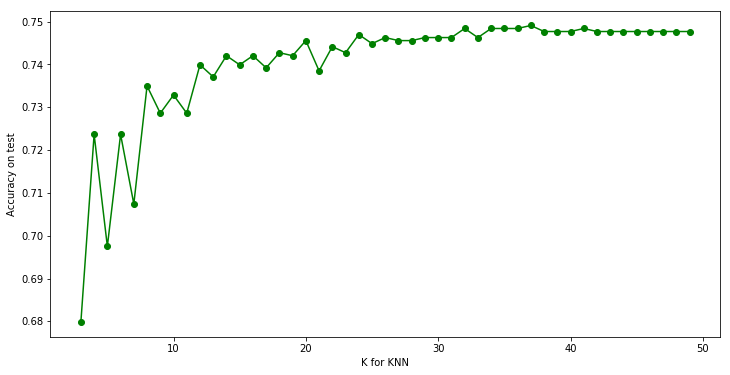

In [19]:
plt.figure(figsize=(12,6))
plt.plot(range(3,50), k_score, marker='o',color = 'green')
plt.xlabel ('K for KNN')
plt.ylabel ('Accuracy on test')
plt.show()

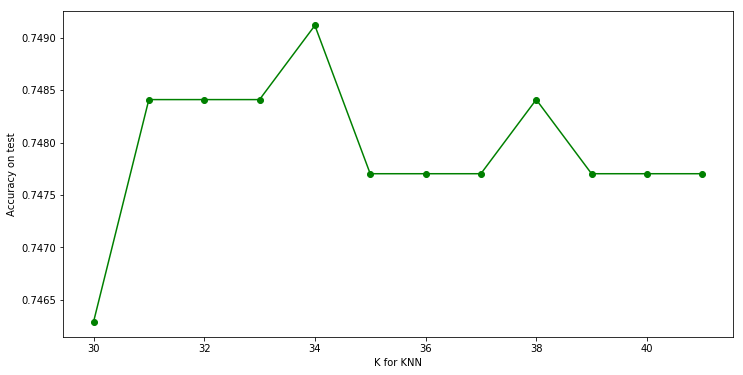

In [20]:
# Re-search the best K within 30 and 42

plt.figure(figsize=(12,6))
plt.plot(range(30,42), k_score[30:42], marker='o',color = 'green')
plt.xlabel ('K for KNN')
plt.ylabel ('Accuracy on test')
plt.show()

# So we find that the best K is 34.

In [46]:
# Self Defining KNN function and distance calculation functions

def euclidean_dist(p, q):
    dist = np.sqrt(np.sum((p-q)**2))
    return(dist)

def my_knn_fit(data_point, X_point, y_point, k):
    neighbors = []
    for i, j in enumerate(X_point):
        dist = euclidean_dist(data_point, j)
        t = [j, y_point[i], dist]
        neighbors.append(t)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return(neighbors[:k])

In [22]:
train_x_np = train_x.to_numpy()
test_x_np = test_x.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

In [47]:
my_knn_fit(test_x_np[0], train_x_np, y_train_np, 2)  # Since there are too many columns, we only set K=2 to illustrate the results

[[array([ 1.300000e+04,  1.300000e+04,  1.300000e+04,  1.000000e+00,
          8.190000e-02,  2.647800e+02,  0.000000e+00,  1.000000e+01,
          0.000000e+00,  1.200000e+05,  0.000000e+00,  0.000000e+00,
          0.000000e+00,  4.300000e+00,  1.000000e+00,  0.000000e+00,
          1.500000e+01,  1.763500e+04,  2.290000e-01,  3.800000e+01,
          1.000000e+00,  1.264669e+04,  1.264669e+04,  5.206900e+02,
          5.206900e+02,  3.533100e+02,  1.673800e+02,  0.000000e+00,
          2.647800e+02,  0.000000e+00,  0.000000e+00, -1.000000e+00,
          8.200000e+01,  6.169010e+05,  5.000000e+00,  3.000000e+00,
          1.000000e+00,  1.000000e+00,  6.000000e+00,  1.124500e+04,
          4.400000e+01,  2.000000e+00,  3.000000e+00,  8.230000e+03,
          2.800000e+01,  7.700000e+04,  2.000000e+00,  0.000000e+00,
          3.000000e+00,  6.000000e+00,  4.112700e+04,  4.936500e+04,
          2.520000e+01,  2.290000e+02,  1.480000e+02,  0.000000e+00,
          0.000000e+00,  6.000000e

In [48]:
test_x_np[0]

array([ 2.500000e+04,  2.500000e+04,  2.500000e+04,  1.000000e+00,
        1.502000e-01,  5.950200e+02,  2.000000e+00,  2.000000e+00,
        0.000000e+00,  1.300000e+05,  2.000000e+00,  0.000000e+00,
        0.000000e+00,  1.241000e+01,  3.000000e+00,  0.000000e+00,
        1.300000e+01,  2.072100e+04,  2.730000e-01,  3.100000e+01,
        1.000000e+00,  2.443226e+04,  2.443226e+04,  1.158750e+03,
        1.158750e+03,  5.677400e+02,  5.910100e+02,  0.000000e+00,
        5.950200e+02,  0.000000e+00,  0.000000e+00, -1.000000e+00,
        0.000000e+00,  6.177810e+05,  1.000000e+00,  2.000000e+00,
        0.000000e+00,  0.000000e+00,  2.600000e+01,  3.707300e+04,
        3.000000e+01,  0.000000e+00,  0.000000e+00,  1.346200e+04,
        2.600000e+01,  7.600000e+04,  2.000000e+00,  0.000000e+00,
        1.000000e+00,  2.000000e+00,  4.752200e+04,  4.297900e+04,
        3.250000e+01,  1.230000e+02,  4.120000e+02,  2.900000e+01,
        3.000000e+00,  8.000000e+00,  2.900000e+01,  4.000000e

In [79]:
def my_knn_predict(data_point, X_point, y_point, k):

    neighbors = my_knn_fit(data_point, X_point, y_point, k)
    labels = [x[1] for x in neighbors]
    p = max(labels, key = labels.count)
    return(p)

In [80]:
y_pred_np = my_knn_predict(test_x_np[1], train_x_np, y_train_np, 34)

In [81]:
print(test_x_np[1], y_test_np[1], y_pred_np)

[ 9.00000e+03  9.00000e+03  9.00000e+03  0.00000e+00  1.61400e-01
  3.17040e+02  2.00000e+00  1.00000e+01  0.00000e+00  8.06000e+04
  1.00000e+00  1.00000e+00  1.00000e+00  1.47100e+01  0.00000e+00
  0.00000e+00  8.00000e+00  1.19290e+04  7.50000e-01  1.00000e+01
  1.00000e+00  8.40409e+03  8.40409e+03  9.30940e+02  9.30940e+02
  5.95910e+02  3.35030e+02  0.00000e+00  3.17040e+02  0.00000e+00
  0.00000e+00 -1.00000e+00  0.00000e+00  1.32424e+05  0.00000e+00
  1.00000e+00  0.00000e+00  1.00000e+00  2.10000e+01  2.86280e+04
  8.40000e+01  1.00000e+00  3.00000e+00  5.16900e+03  8.10000e+01
  1.59000e+04  2.00000e+00  0.00000e+00  1.00000e+00  5.00000e+00
  1.65530e+04  2.30200e+03  8.36000e+01  1.15000e+02  4.80000e+01
  1.20000e+01  8.00000e+00  1.00000e+00  1.20000e+01  1.10000e+01
  0.00000e+00  3.00000e+00  4.00000e+00  4.00000e+00  4.00000e+00
  3.00000e+00  6.00000e+00  6.00000e+00  4.00000e+00  8.00000e+00
  0.00000e+00  0.00000e+00  2.00000e+00  1.00000e+02  7.50000e+01
  1.42458e

In [68]:
def my_error(train_x, test_x, y_train, y_test, k):
    error = 0
    for i, p in enumerate(test_x):
        error += y_test[i] != my_knn_predict(p, train_x, y_train, k)
    return error/k

In [82]:
error = my_error(train_x_np, test_x_np, y_train_np, y_test_np, 34)
error

10.529411764705882

In [84]:
predicted_labels = np.array([my_knn_predict(point, train_x_np, y_train_np, 34) for point in test_x_np])

In [85]:
confusion_2 = confusion_matrix(y_test_np, predicted_labels)
print(confusion_2)

[[1053    5]
 [ 353    4]]


In [86]:
confusion

array([[965,  93],
       [321,  36]], dtype=int64)

In [87]:
print(classification_report(y_test_np, predicted_labels))

              precision    recall  f1-score   support

           0       0.75      1.00      0.85      1058
           1       0.44      0.01      0.02       357

    accuracy                           0.75      1415
   macro avg       0.60      0.50      0.44      1415
weighted avg       0.67      0.75      0.64      1415



#### We conclude that the KNN classification algorithm implemented by ourselves has a better performance on macro avg and confusion matrix than those of scikit-learn based KNN classifier.